In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\renin prince'

In [3]:
os.chdir(r'C:\Studies\ML\opencv\project\Testing_1')

In [4]:
files = os.listdir()

In [5]:
files[0]

'Apple'

In [6]:
dataset_testing = []
label_testing = []

## Loop for creating dataset list from files

In [7]:
count = 0
for i in range(len(files)):
    os.chdir(r'C:/Studies/ML/opencv/project/Testing_1/'+str(files[i]))
    imges = os.listdir()
    for i in imges:
        images = cv2.imread(str(i),0)
#         images = images.reshape(10,3000)
        label_testing.append(count)
        dataset_testing.append(images)
    count += 1

In [8]:
len(dataset_testing)

8729

# Creating numpy arrays for images and labels

In [9]:
data = np.array(dataset_testing)

In [10]:
label = np.array(label_testing)

In [11]:
data.shape

(8729, 100, 100)

In [12]:
label.shape

(8729,)

In [13]:
data[0].shape

(100, 100)

# visualiztion using random values

In [14]:
import random

8103
Label:21    checking...Tomato


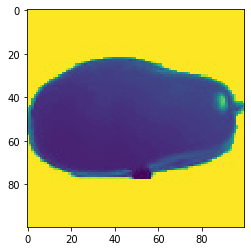

In [16]:
num = random.randint(0,8729)
print(num)
print('Label:'+ str(label[num])+'    checking...'+str(files[label[num]]))
plt.imshow(data[num])

In [86]:
# import xlwt 
# from xlwt import Workbook 
  
# # Workbook is created 
# wb = Workbook() 
  
# # add_sheet is used to create sheet. 
# sheet1 = wb.add_sheet('Sheet 1') 

In [72]:
# for i in range(len(dataset_testing)):
#     sheet1.write(i+1, 0, 'Label '+ str(files[int(dataset_testing[i][0])]))
#     sheet1.write(i+1, 1, ' '.join(map(str, dataset_testing[i][1])))
    
#     wb.save('xlwt test_data.xls') 

# Creating model using tensorflow

In [134]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100,100)),
    keras.layers.Dense(128, activation=tf.nn.swish),
    keras.layers.Dense(256, activation=tf.nn.swish),
    keras.layers.Dense(22, activation=tf.nn.softmax)
])

In [135]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
model.fit(data,label,epochs=15)

Train on 8729 samples
Epoch 1/15
8729/8729 [==============================] - 4s 428us/sample - loss: 88.2572 - accuracy: 0.2574
Epoch 2/15
8729/8729 [==============================] - 3s 349us/sample - loss: 2.5098 - accuracy: 0.2975
Epoch 3/15
8729/8729 [==============================] - 3s 340us/sample - loss: 2.4349 - accuracy: 0.2998
Epoch 4/15
8729/8729 [==============================] - 3s 349us/sample - loss: 2.3825 - accuracy: 0.3115
Epoch 5/15
8729/8729 [==============================] - 3s 348us/sample - loss: 2.3766 - accuracy: 0.3180
Epoch 6/15
8729/8729 [==============================] - 3s 371us/sample - loss: 2.4703 - accuracy: 0.3061
Epoch 7/15
8729/8729 [==============================] - 3s 350us/sample - loss: 2.4931 - accuracy: 0.3018
Epoch 8/15
8729/8729 [==============================] - 3s 343us/sample - loss: 2.4829 - accuracy: 0.3038
Epoch 9/15
8729/8729 [==============================] - 3s 348us/sample - loss: 2.4803 - accuracy: 0.3040
Epoch 10/15
8729/8729 [

In [20]:
os.chdir(r'C:\Studies\ML\opencv\fruits\Fruit-Images-Dataset-master\test-multiple_fruits')

In [21]:
trying_2_test = os.listdir()

In [34]:
from skimage.transform import resize

28
cherries6.jpg


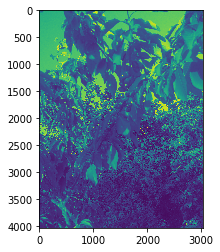

In [160]:
num = random.randint(0,len(trying_2_test))
print(num)
t_2_t = cv2.imread(str(trying_2_test[num]),0)
print(trying_2_test[num])
plt.imshow(t_2_t)
# t_2_t_res = resize(t_2_t, (100, 100))
t_2_t_res = cv2.resize(t_2_t, dsize=(100, 100), interpolation=cv2.INTER_LANCZOS4)

In [161]:
predictions = model.predict(t_2_t_res.reshape(1,100,100))

In [162]:
predictions

array([[0.24567787, 0.01955719, 0.03722263, 0.03600591, 0.01645483,
        0.01770487, 0.01956138, 0.03770984, 0.01926433, 0.02655535,
        0.12799716, 0.01834031, 0.01981835, 0.01919322, 0.01898833,
        0.01917627, 0.01840423, 0.01103813, 0.01965735, 0.05103272,
        0.06952631, 0.1311134 ]], dtype=float32)

In [163]:
num = np.argmax(predictions)
print(num)
print('Label:'+ str(files[num]))
# plt.imshow(trying_2_test[num])

0
Label:Apple


In [ ]:
24567787

In [201]:
os.chdir(r'C:\Studies\ML\opencv\fruits\Fruit-Images-Dataset-master\Training')

In [202]:
testing_with_train = os.listdir()

In [207]:
for j in testing_with_train:
    os.chdir(r'C:/Studies/ML/opencv/fruits/Fruit-Images-Dataset-master/Training/' +str(j))
    trying_2_test = os.listdir()
    t_2_t = cv2.imread(str(trying_2_test[5]),0)
    predictions = model.predict(t_2_t.reshape(1,100,100))
    num = np.argmax(predictions)
    print(j)
    print(num)
    print('Label:'+ str(files[num]))
    print('\n')
    
    
    

Apple Braeburn
0
Label:Apple


Apple Crimson Snow
0
Label:Apple


Apple Golden 1
0
Label:Apple


Apple Golden 2
0
Label:Apple


Apple Golden 3
0
Label:Apple


Apple Granny Smith
0
Label:Apple


Apple Pink Lady
0
Label:Apple


Apple Red 1
0
Label:Apple


Apple Red 2
0
Label:Apple


Apple Red 3
0
Label:Apple


Apple Red Delicious
0
Label:Apple


Apple Red Yellow 1
0
Label:Apple


Apple Red Yellow 2
0
Label:Apple


Apricot
1
Label:Apricot


Avocado
2
Label:Avocado


Avocado ripe
2
Label:Avocado


Banana
3
Label:Banana


Banana Lady Finger
10
Label:Cherry


Banana Red
19
Label:Onion


Beetroot
21
Label:Tomato


Blueberry
20
Label:Plum


Cactus fruit
6
Label:Cactus fruit


Cantaloupe 1
7
Label:Cantaloupe


Cantaloupe 2
7
Label:Cantaloupe


Carambula
18
Label:Granadilla


Cauliflower
14
Label:Dates


Cherry 1
10
Label:Cherry


Cherry 2
10
Label:Cherry


Cherry Rainier
0
Label:Apple


Cherry Wax Black
10
Label:Cherry


Cherry Wax Red
10
Label:Cherry


Cherry Wax Yellow
10
Label:Cherry


Chest

In [208]:
model.save('with10epochs.pb')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: with10epochs.pb\assets


In [209]:
model.save('with10epochs.h5')